<a href="https://colab.research.google.com/github/Ravi-shankar100/ANN-and-CNN-from-Udemy/blob/main/CNN_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
train_dir = '/content/drive/MyDrive/cats_and_dogs_photos/train'
valid_dir = '/content/drive/MyDrive/cats_and_dogs_photos/validation'
test_dir = '/content/drive/MyDrive/cats_and_dogs_photos/test'

In [ ]:
#Data Preprocessing

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Generating Batches of Image Data

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import  models

In [ ]:
#Creating the CNN Model

model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32,(3,3),activation= "relu",input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation= "relu",input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(128,(3,3),activation= "relu",input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Conv2D(64,(3,3),activation= "relu",input_shape = (150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(512,activation = "relu"))
model.add(keras.layers.Dense(1,activation = "sigmoid"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        7

In [ ]:
model.compile(loss = "binary_crossentropy",
              optimizer = keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics = ["accuracy"])

In [ ]:
model_history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 50
    
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 657s 7s/step - loss: 0.6925 - accuracy: 0.5322 - val_loss: 0.6701 - val_accuracy: 0.6110
Epoch 2/20
100/100 [==============================] - 12s 116ms/step - loss: 0.6691 - accuracy: 0.5921 - val_loss: 0.6629 - val_accuracy: 0.5900
Epoch 3/20
100/100 [==============================] - 12s 117ms/step - loss: 0.6274 - accuracy: 0.6359 - val_loss: 0.6216 - val_accuracy: 0.6610
Epoch 4/20
100/100 [==============================] - 11s 114ms/step - loss: 0.5756 - accuracy: 0.7034 - val_loss: 0.6464 - val_accuracy: 0.6290
Epoch 5/20
100/100 [==============================] - 11s 115ms/step - loss: 0.5562 - accuracy: 0.7114 - val_loss: 0.5912 - val_accuracy: 0.6870
Epoch 6/20
100/100 [==============================] - 12s 116ms/step - loss: 0.5295 - accuracy: 0.7278 - val_loss: 0.6142 - val_accuracy: 0.6760
Epoch 7/20
100/100 [==============================] - 12s 117ms/step - loss: 0.4993 - accuracy: 0.7647 - val_loss: 0.5885 - val_accu

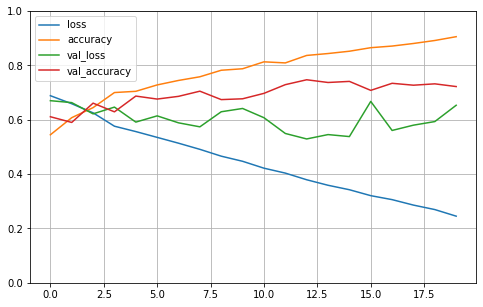

In [ ]:
pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid()
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
#From this above model we have a overfitting as there is a huge gap between train acc and val acc
#We will create the dummy data and then fit the model again with the new data

model.save("model.h5")

In [ ]:
import keras.backend as k

k.clear_session()
del model

In [ ]:
#Applying Data Augmentation to the Training Data

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = "binary"
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import keras.layers as layers
import keras.models as models

In [ ]:
#Create the CNN Model

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation= "relu",input_shape = (150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation= "relu",input_shape = (150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation= "relu",input_shape = (150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Conv2D(128,(3,3),activation= "relu",input_shape = (150,150,3)))
model.add(layers.MaxPool2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512,activation = "relu"))
model.add(layers.Dense(1,activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
model.compile(loss= "binary_crossentropy",
              optimizer = keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics = ["accuracy"])

In [ ]:
model_history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 50
)